### Game Graph Class

In [33]:
class node:
    def __init__(self, value=None, left=None, right=None, parent=None):
        self.value=value
        self.left = left
        self.right = right
        self.parent = parent
        
def make_children(source):
    left = node(parent=source)
    right = node(parent=source)
    source.left = left
    source.right = right
    return left, right

def make_tree(n):
    source = node()
    tree = [[] for  i in range(n+1)] #i is height
    tree[0].append(source)
    for i in range(n):
        for j in range(pow(2, i)):
            tree[i+1]+=make_children(tree[i][j])
            
    for j in range(pow(2, n)):
        tree[n][j].value = np.random.random()
    return tree



### Value calculation

In [14]:
# Example tree:
tree4 = make_tree(4)
import numpy as np
for v in tree4[-1]:
    v.value=np.random.random()
    
    
def DFS_visit(node, Paul=True):
    
    if not node.value:
        DFS_visit(node.left, Paul=not Paul)
        DFS_visit(node.right, Paul=not Paul)
        if node.left.value:
            if node.right.value:
                if Paul:
                    node.value = max(node.left.value, node.right.value)
                else:
                    node.value = min(node.left.value, node.right.value)
                    
# Example calculation:                    
DFS_visit(tree4[0][0])
tree4[0][0].value

0.6239178410815344

### Simulations
#### 1 Test the effect of parity of tree depth
No significant effect

In [50]:
ks = np.random.randint(5, 10, 100)
even_numbers = 2*ks
plus_or_minus = np.random.choice((1, -1))
odd_numbers = even_numbers + plus_or_minus

t0 = time.time()
even_trees = [make_tree(n) for n in even_numbers]
t1 = time.time()
print(t1 - t0)

odd_trees = [make_tree(n) for n in odd_numbers]


t0 = time.time()
for tree in even_trees:
    DFS_visit(tree[0][0])
t1 = time.time()
print(t1 - t0)

for tree in odd_trees:
    DFS_visit(tree[0][0])    

16.489085912704468
15.867159843444824


In [51]:
from scipy import stats
odd_values = [tree[0][0].value for tree in odd_trees]
even_values = [tree[0][0].value for tree in odd_trees]
stats.ttest_ind(odd_values, even_values, equal_var=False) ### No advantage to playing last

Ttest_indResult(statistic=0.0, pvalue=1.0)

#### 2. Advantage to playing first? Run t-test on all results against 0.
There's a significant advantage to playing first. 

In [57]:
values = odd_values + even_values
stats.ttest_1samp(values, popmean=0) 

Ttest_1sampResult(statistic=416.01960097276236, pvalue=1.7170934343828929e-294)

In [59]:
np.mean(values)

0.62656827101437584

In [61]:
np.std(values)

0.02124619405376103

#### 3. Variance

In [64]:
ns = [15]*100
trees15 = [make_tree(n) for n in ns]
for tree in trees15:
    DFS_visit(tree[0][0])

values = [tree[0][0].value for tree in trees15]
print('The average value for the first player, Paul, is: %.2f'%np.mean(values))
print('The standard deviation for the value fro the first player, Paul, is: %.2f'%np.std(values))

The average value for the first player, Paul, is: 0.63
The standard deviation for the value fro the first player, Paul, is: 0.02


#### 4. Plot distribution

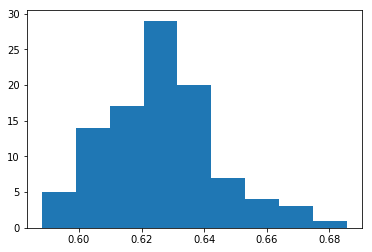

In [110]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(values, bins=9)
#means = [np.mean([edge, bins[i+1]]) for i, edge in enumerate(bins[:-1])]
#plt.plot(means, n, color='skyblue')
plt.show()

#### 5. $$\lim_{n\rightarrow \infty}Value[s]$$

In [ ]:
## Caution: this takes long unless you add alpha-beta pruning!
### It likely kills the kernel
large_tree = make_tree(40)
time0 = time.time()
DFS_visit(large_tree[0][0])
time1 = time.time()
print("Large tree value computation took %.3f seconds."(time1 - time0))